### Quantum Tunneling in Econophysics

In the realm of econophysics, quantum tunneling offers a fascinating analogy to financial markets. Traditionally, quantum tunneling describes a phenomenon where particles overcome potential energy barriers that, according to classical physics, they should not be able to cross. This process occurs due to the wave-like nature of particles, allowing them to "tunnel" through barriers with a certain probability.

In financial markets, barriers can be seen as resistance levels, psychological thresholds, or regulations that, under classical economic theories, would prevent certain market behaviors. However, just as particles can tunnel through quantum barriers, markets sometimes breach these thresholds unpredictably, driven by factors like investor sentiment, high-frequency trading algorithms, or complex derivative products. 

This quantum perspective provides a fresh lens to model market behaviors, especially in understanding how seemingly insurmountable economic conditions can give way to unexpected outcomes, much like a particle surmounting an energy barrier. 

The application of quantum tunneling in econophysics could revolutionize how we understand and predict market movements. As quantum computing matures, we might develop sophisticated models that simulate market dynamics with unparalleled precision, accounting for the probabilistic nature of economic systems. This could lead to new strategies in risk management and investment, where the ability to anticipate and respond to "tunneling" events becomes a critical advantage. The future of econophysics lies in harnessing these quantum phenomena to create a more robust and resilient financial system. 

#### Below are formulae for this problem

##### 1. Quantum Tunneling Transmission Probability

The transmission probability \( T(E) \) for a particle with energy \( E \) to tunnel through a potential barrier of height \( V_0 \) and width \( a \) is given by:

$$
T(E) = \exp\left(-2 \cdot \frac{\sqrt{2m(V_0 - E)}}{\hbar} \cdot a\right)
$$

**Where:**

$$
m \text{ is the mass of the particle (e.g., electron mass \( m_e \)).}
$$
$$
\hbar \text{ is the reduced Planck's constant.}
$$
$$
a \text{ is the width of the potential barrier.}
$$
$$
E \text{ is the energy of the particle.}
$$
$$
V_0 \text{ is the height of the potential barrier.}
$$

##### 2. Market Behavior Analogy

In econophysics, we can draw an analogy between quantum tunneling and market behavior. The exponential decay in quantum tunneling probability can be modeled similarly for market behaviors where a market variable \( M(E) \) is affected by an analogous "barrier":

$$
M(E) = a \cdot \exp(-b \cdot E)
$$

**Where:**

$$
M(E) \text{ is the market response as a function of some economic energy \( E \).}
$$
$$
a \text{ and \( b \) are fitting parameters representing the scale and rate of decay.}
$$

##### 3. Quantum Circuit Rotation Angle

In a quantum simulation of tunneling effects, the rotation angle \( \theta \) applied to a qubit can be derived from the transmission probability \( T(E) \) as:



$$
\theta = \arcsin\left(\sqrt{T(E)}\right)
$$

**Where:**

$$
\theta \text{ is the angle used in the quantum gate to simulate the tunneling effect.}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_e, e
from scipy.optimize import curve_fit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Constants
m = m_e  # Mass of electron
V0 = 1.0 * e  # Potential barrier in eV
a = 1e-10  # Width of the barrier in meters
E = np.linspace(0.01 * e, 2 * e, 500)  # Range of energies in Joules

In [3]:
# Transmission probability for quantum tunneling
def transmission_probability(E, m, V0, a):
    k2 = np.sqrt(2 * m * (V0 - E)) / hbar
    T = np.exp(-2 * k2 * a)
    T[E >= V0] = 0  # Avoid NaNs for energies greater than the barrier height
    return T

In [4]:
# Calculate transmission probabilities
T = transmission_probability(E, m, V0, a)

In [5]:
# Filter out invalid values
valid_idx = np.isfinite(T) & (T > 0)
E_valid = E[valid_idx]
T_valid = T[valid_idx]

In [6]:
# Simulating econophysics scenario (hypothetical function)
def market_behavior(E, a, b):
    return a * np.exp(-b * E)

In [7]:
# Fitting the model to transmission probability
popt, _ = curve_fit(market_behavior, E_valid / e, T_valid)
predicted_T = market_behavior(E_valid / e, *popt)

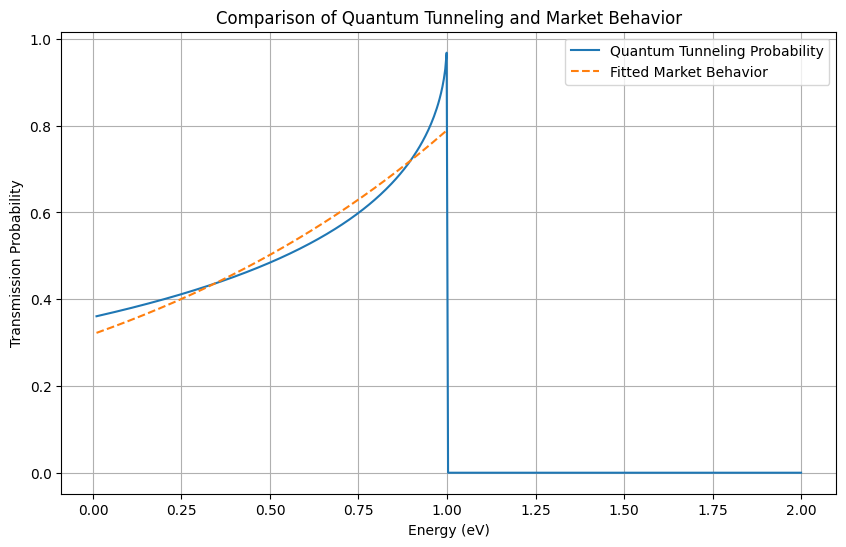

In [8]:
# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.plot(E / e, T, label='Quantum Tunneling Probability')
plt.plot(E_valid / e, predicted_T, label='Fitted Market Behavior', linestyle='--')
plt.title('Comparison of Quantum Tunneling and Market Behavior')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission Probability')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Qiskit Integration: Quantum Circuit Simulation
qc = QuantumCircuit(1)
qc.h(0)  # Apply Hadamard gate to create superposition
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=())

In [10]:
# Add a custom gate that represents the tunneling effect
theta = np.arcsin(np.sqrt(predicted_T[0]))  # Using the first fitted transmission probability
qc.ry(2 * theta, 0)

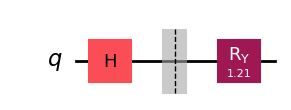

In [11]:
# Visualize the circuit
qc.draw('mpl')
plt.show()

In [12]:
 # Measure
qc.measure_all()

In [13]:
# Initialize AerSimulator 
simulator = AerSimulator()

In [14]:
# Save statevector
qc.save_statevector()

In [15]:
# Run the circuits
result = simulator.run(qc).result()
counts = result.get_counts()
statevector = result.get_statevector(qc)


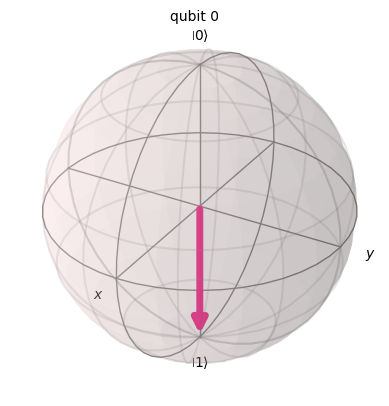

In [16]:
# Visualize the result on the Bloch sphere
plot_bloch_multivector(statevector).show()

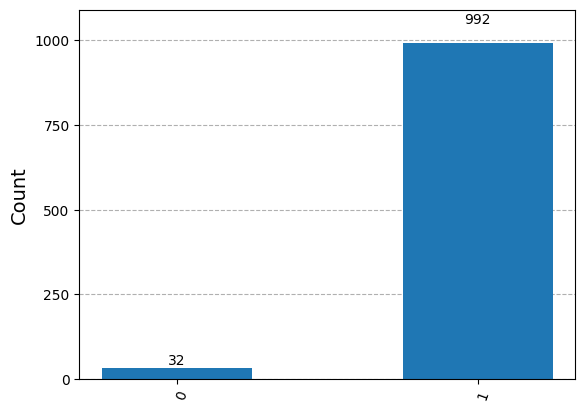

In [17]:
# Visualize the measurement result as a histogram
plot_histogram(counts).show()